## PART 1

In [2]:
## importing the libraries 
import pandas as pd 
import numpy as np 
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
from torchviz import make_dot

### STEP 1

In [118]:
dataset=pd.read_csv('dataset.csv')

### STEP 2

In [119]:
dataset.head()
dataset.shape

(766, 8)

In [120]:
dataset.dtypes

f1        object
f2        object
f3         int64
f4        object
f5        object
f6        object
f7        object
target     int64
dtype: object

In [121]:
dataset['f1']=dataset['f1'].replace('c',0)
dataset['f2']=dataset['f2'].replace('f',0)
dataset['f4']=dataset['f4'].replace('a',0)
dataset['f5']=dataset['f5'].replace('b',0)
dataset['f6']=dataset['f6'].replace('d',0)
dataset['f7']=dataset['f7'].replace('e',0)
dataset.shape

(766, 8)

In [122]:
# print(dataset.dtypes)
dataset['f1']=dataset['f1'].astype(int)
dataset['f2']=dataset['f2'].astype(int)
dataset['f4']=dataset['f4'].astype(int)
dataset['f5']=dataset['f5'].astype(int)
dataset['f6']=dataset['f6'].astype(float)
dataset['f7']=dataset['f7'].astype(float)
print(dataset.dtypes)

f1          int64
f2          int64
f3          int64
f4          int64
f5          int64
f6        float64
f7        float64
target      int64
dtype: object


In [123]:
## Corelation Matrix 
dataset.corr()

,f1,f2,f3,f4,f5,f6,f7,target
f1,1.000000,0.116374,0.140649,-0.081024,-0.075263,0.008528,-0.032936,0.222117
f2,0.116374,1.000000,0.149176,0.053648,0.332623,0.209449,0.139068,0.452661
f3,0.140649,0.149176,1.000000,0.207707,0.088625,0.276698,0.042172,0.064623
f4,-0.081024,0.053648,0.207707,1.000000,0.438006,0.379728,0.184717,0.075787
f5,-0.075263,0.332623,0.088625,0.438006,1.000000,0.190722,0.185765,0.129513
f6,0.008528,0.209449,0.276698,0.379728,0.190722,1.000000,0.145132,0.293186
f7,-0.032936,0.139068,0.042172,0.184717,0.185765,0.145132,1.000000,0.174770
target,0.222117,0.452661,0.064623,0.075787,0.129513,0.293186,0.174770,1.000000


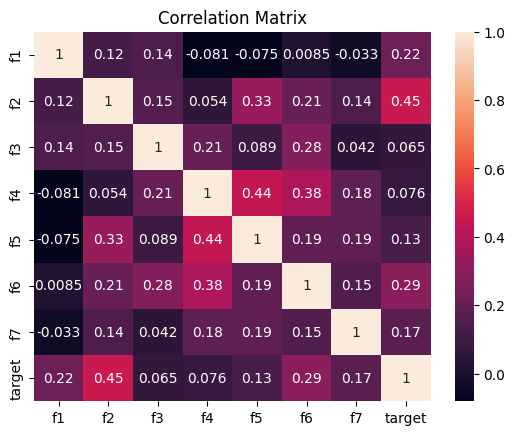

In [124]:
## Heatmap
#plot-1
Heatmap=sns.heatmap(dataset.corr(),annot=True)
Heatmap.set(title="Correlation Matrix")
plt.show()

In [125]:
## Normalization of the data.
col = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
scaler=StandardScaler()
scaler.fit(dataset.loc[:,col])
dataset.loc[:,col]= scaler.transform(dataset.loc[:,col])
print(dataset)

           f1        f2        f3        f4        f5        f6        f7  \
0    0.639162  0.846120  0.148790  0.907715 -0.693970  0.206169  0.468974   
1   -0.843570 -1.110188 -0.161060  0.531703 -0.693970 -0.671891 -0.363480   
2    1.232254  1.932958 -0.264343 -1.285691 -0.693970 -1.085833  0.604700   
3   -0.843570 -0.985978 -0.161060  0.155690  0.121578 -0.483735 -0.918449   
4   -1.140116  0.504542 -1.503740  0.907715  0.763605  1.397821  5.478777   
..        ...       ...       ...       ...       ...       ...       ...   
761  1.528801 -0.985978 -0.367626 -1.285691 -0.693970 -1.186183 -1.422144   
762  1.825347 -0.613348  0.355356  1.722409  0.867717 -4.008517 -0.906384   
763 -0.547023  0.038755  0.045507  0.406365 -0.693970  0.607567 -0.396657   
764 -1.140116  0.007702  0.148790  0.155690  0.277747 -0.722066 -0.683190   
765 -0.843570  0.162965 -0.470909 -1.285691 -0.693970 -0.232861 -0.369512   

     target  
0         1  
1         0  
2         1  
3         0  
4    

In [126]:
## Main Stastical Values 
dataset.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,766.000000,7.660000e+02,7.660000e+02,7.660000e+02,7.660000e+02,7.660000e+02,7.660000e+02,766.000000
mean,0.000000,2.087103e-16,3.061085e-16,-9.971716e-17,-5.507634e-17,5.333709e-17,2.319004e-17,0.349869
std,1.000653,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00,0.477240
min,-1.140116,-3.749651e+00,-3.569403e+00,-1.285691e+00,-6.939700e-01,-4.008517e+00,-1.422144e+00,0.000000
25%,-0.843570,-6.754529e-01,-3.418051e-01,-1.285691e+00,-6.939700e-01,-5.840848e-01,-6.884686e-01,0.000000
50%,-0.250477,-1.165077e-01,1.487897e-01,1.556901e-01,-3.989846e-01,5.469449e-03,-2.986330e-01,0.000000
75%,0.639162,5.977000e-01,5.619222e-01,7.197089e-01,4.143942e-01,5.824799e-01,4.644496e-01,1.000000
max,3.901171,2.429798e+00,2.730868e+00,4.918516e+00,6.645960e+00,4.408310e+00,5.876907e+00,1.000000


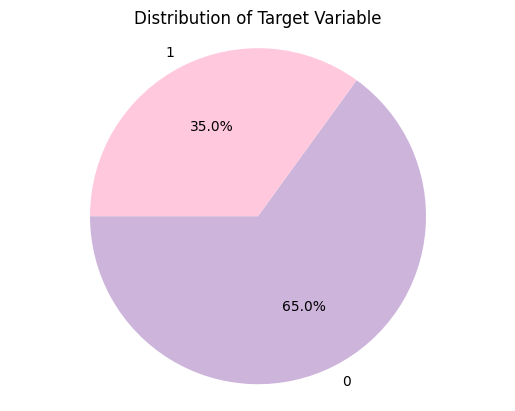

In [127]:
## Plots
#plot-2
sizes = [sum(dataset['target']==0), sum(dataset['target']==1)]
plt.pie(sizes, labels=['0','1'],colors=['#CDB4DB', '#FFC8DD'], autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title('Distribution of Target Variable')
plt.show()

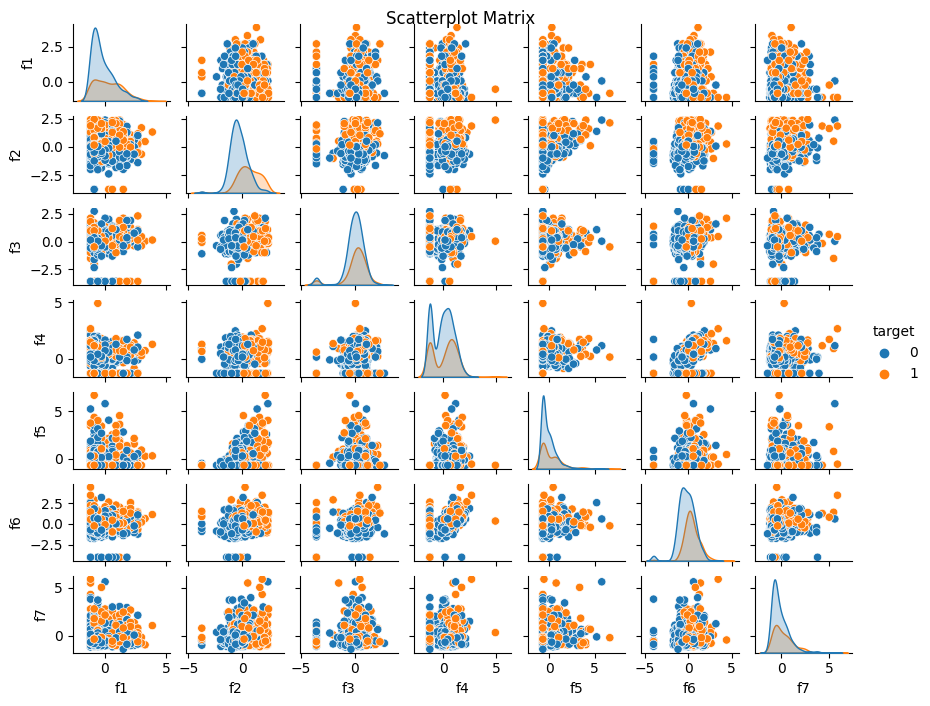

In [128]:
#Plot-3
##pairwise plot
sns.pairplot(dataset,hue='target',height=1,aspect=1.25)
plt.suptitle('Scatterplot Matrix',y=1)
plt.show()


In [129]:
y=torch.tensor(dataset['target'].values.astype(np.int64), dtype=torch.int64)
X=torch.tensor(dataset.iloc[:,:-1].values.astype(np.float32))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape

torch.Size([612, 7])

In [130]:
batch_size = 55
train_dataloader = DataLoader(TensorDataset(X_train,y_train), batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(TensorDataset(X_test,y_test), batch_size=batch_size, shuffle=True)

### STEP 3

#### Q1:  How many input neurons are there?

In the modle we have 7 input features, means there are 7 input neurons

#### Q2: What activation function will you choose?

Choosing the ReLU function as the activation function

#### Q3: What is the number of hidden layers?

Selcting 2 hidden layer network

#### Q4: What is the size of each hidden layer?

hidden layer 1 size: 64,

hidden layer 2 size: 31

#### Q5: What activation function is used for the hidden and output layer?

Hidden layer activation function: ReLU activation function

Output layer activation function: Sigmoid Function

### STEP 4

In [131]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=2, bias=True)
  )
)


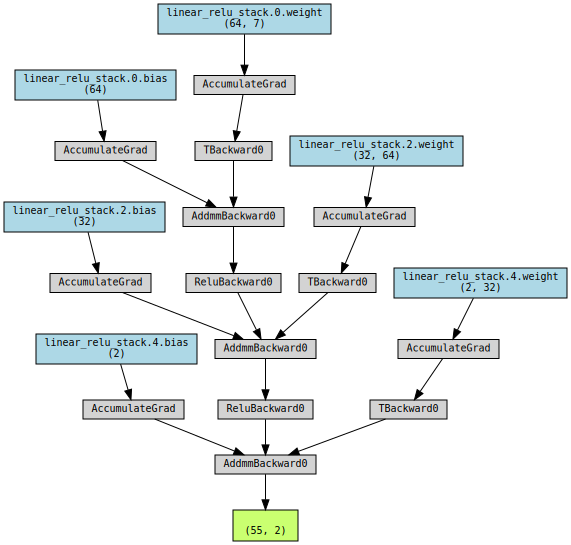

In [132]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
model = NeuralNetwork().to(device)
print(model)
## Neural Network Architecture 
ARCH_dia = torch.randn(55, 7)
output_dia = model(ARCH_dia)
make_dot(output_dia, params=dict(model.named_parameters()))

In [133]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    train_loss,correct=0,0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Train loss and accuracy 
        train_loss+=loss.item()*len(X)
        correct+=(pred.argmax(1)==y).type(torch.float).sum().item()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"Train Batch {batch}:loss: {loss:>7f}");
    train_loss/=size
    train_acc=correct/size
    print(f"Train Error:\n Accuracy : {(100*train_acc):>0.1f}%,Avg loss: {train_loss:>8f} \n")
    return train_loss,train_acc        
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct/= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss,correct

In [134]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_values=[]
train_accuracy=[]
test_accuracy=[]
test_loss_values=[]

epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    ls,Tr_a=train_loop(train_dataloader, model, loss_fn, optimizer)
    ls
    loss_values.append(ls)
    Tr_a
    train_accuracy.append(Tr_a)
    lf,Ts_a=test_loop(test_dataloader, model, loss_fn)
    test_loss_values.append(lf)
    Ts_a
    test_accuracy.append(Ts_a)

preds = model(X_test)
print("Done!")

Epoch 1
-------------------------------
Train Batch 0:loss: 0.741260
Train Error:
 Accuracy : 35.5%,Avg loss: 0.733988 

Test Error: 
 Accuracy: 35.7%, Avg loss: 0.722970 

Epoch 2
-------------------------------
Train Batch 0:loss: 0.713127
Train Error:
 Accuracy : 41.2%,Avg loss: 0.706884 

Test Error: 
 Accuracy: 42.2%, Avg loss: 0.700962 

Epoch 3
-------------------------------
Train Batch 0:loss: 0.689075
Train Error:
 Accuracy : 55.1%,Avg loss: 0.688699 

Test Error: 
 Accuracy: 63.6%, Avg loss: 0.683490 

Epoch 4
-------------------------------
Train Batch 0:loss: 0.677600
Train Error:
 Accuracy : 64.2%,Avg loss: 0.673799 

Test Error: 
 Accuracy: 66.2%, Avg loss: 0.671171 

Epoch 5
-------------------------------
Train Batch 0:loss: 0.668477
Train Error:
 Accuracy : 67.0%,Avg loss: 0.662117 

Test Error: 
 Accuracy: 63.6%, Avg loss: 0.659338 

Epoch 6
-------------------------------
Train Batch 0:loss: 0.647937
Train Error:
 Accuracy : 66.7%,Avg loss: 0.651542 

Test Error: 
 

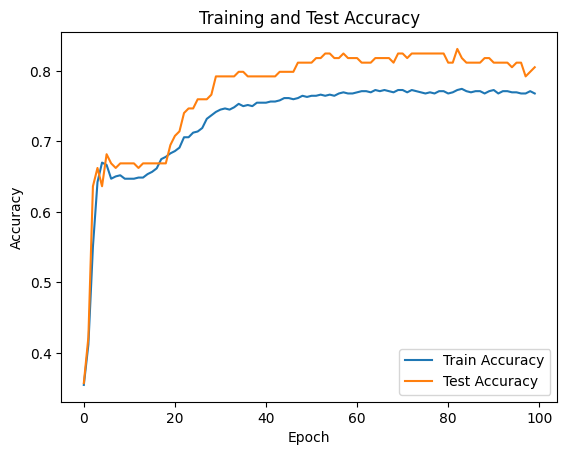

In [135]:
## Plots for Test and Train Accuracies 
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()


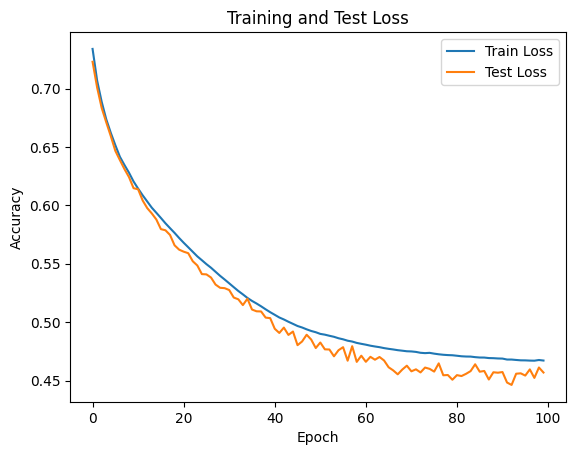

In [136]:
## Plots for Test and Train Loss
plt.plot(loss_values,label='Train Loss')
plt.plot(test_loss_values,label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.title("Training and Test Loss")
plt.legend()
plt.show()


### Calculating the test accuracy

In [137]:
y_pred=preds.argmax(1)
correct =0
correct += (y_pred == y_test).type(torch.float).sum().item()
round((correct/len(y_test))*100,2)
print(f"Accuracy: {(correct/len(y_test))*100:>0.1f}%")

Accuracy: 80.5%


### Plotting confusion matrix

<Axes: >

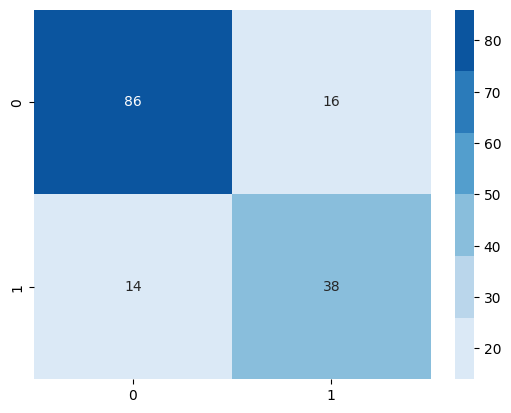

In [138]:
cm = confusion_matrix(y_test, y_pred)
colormap = sns.color_palette("Blues")
sns.heatmap(pd.DataFrame(cm), annot=True,cmap=colormap)

### Saving the model parameters

In [139]:
torch.save(model.state_dict(), 'tharunsa_saikorup_assignment2_part1.h5')

## PART 2

## Hyperparameter: Dropout probability

for SGD optimizer accuracy is 68% for dropout probability 0.3


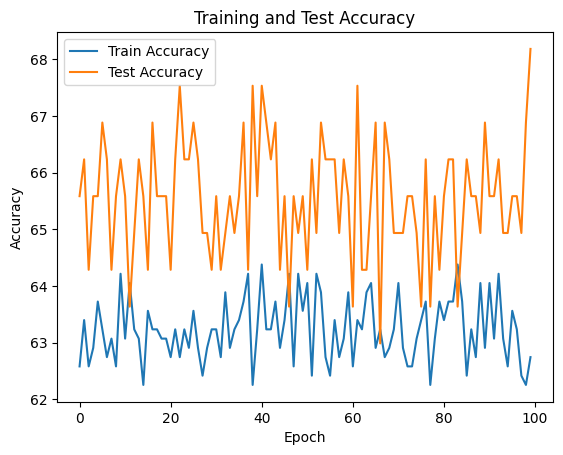

for SGD optimizer accuracy is 63% for dropout probability 0.5


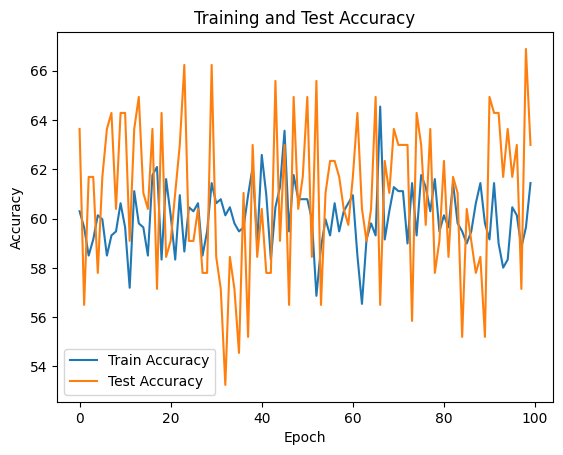

for SGD optimizer accuracy is 54% for dropout probability 0.7


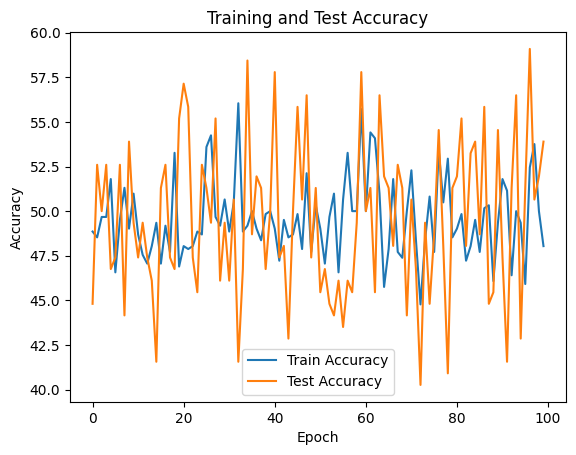

In [141]:
class NeuralNetwork2(nn.Module):
    def __init__(self,dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Dropout(p=dropout_prob),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
            nn.Dropout(p=dropout_prob),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    correct /= size
    return (correct*100),loss
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return (correct*100)

    
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_values=[]

for i in [0.3,0.5,0.7]:
    model = NeuralNetwork2(dropout_prob=i).to(device)

    train_acc_values = []
    test_acc_values = []
    for t in range(epochs):
        acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
        loss_values.append(ls)
        train_acc_values.append(acc)    
        final_accuracy = test_loop(test_dataloader, model, loss_fn)
        test_acc_values.append(final_accuracy)
    print(f"for SGD optimizer accuracy is {round(final_accuracy)}% for dropout probability {i}")
    ## Plots for Test and Train Accuracies 
    plt.plot(train_acc_values, label='Train Accuracy')
    plt.plot(test_acc_values, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy')
    plt.legend()
    plt.show()

## Hyperparameter: Optimizer

### Optimizer 1: SGD

In [142]:
class NeuralNetwork2(nn.Module):
    def __init__(self,dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Dropout(p=dropout_prob),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
            nn.Dropout(p=dropout_prob),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2(dropout_prob=0.2).to(device)
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    correct /= size
    return (correct*100),loss
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return (correct*100)

    
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_values=[]

epochs = 100
train_acc_values = []
test_acc_values = []
for t in range(epochs):
    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)
print(f"for SGD optimizer accuracy is {round(final_accuracy)}%")

for SGD optimizer accuracy is 81%


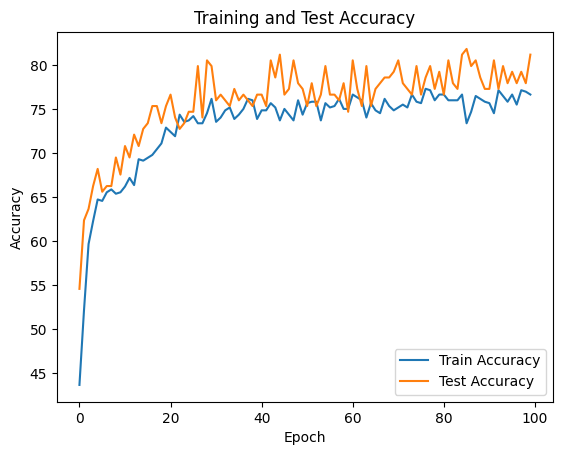

In [143]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

### Optimizer 2: Averaged stochastic gradient descent (ASGD)

In [144]:
class NeuralNetwork2(nn.Module):
    def __init__(self,dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Dropout(p=dropout_prob),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
            nn.Dropout(p=dropout_prob),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2().to(device)
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    correct /= size
    return (correct*100),loss
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return (correct*100)

    
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.ASGD(model.parameters(), lr=0.01)
loss_values=[]

epochs = 100
train_acc_values = []
test_acc_values = []
for t in range(epochs):
    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)
print(f"for ASGD optimizer accuracy is {round(final_accuracy)}%")

for ASGD optimizer accuracy is 76%


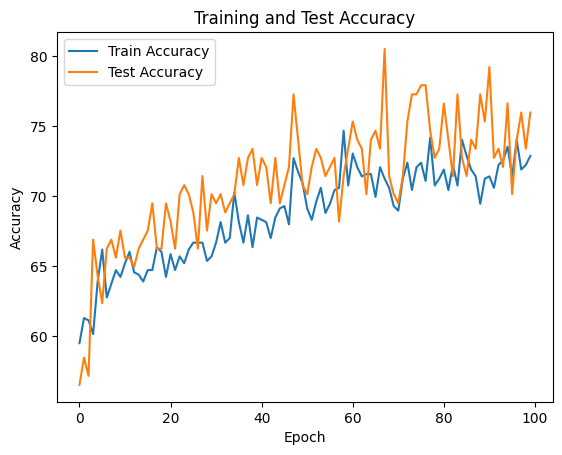

In [145]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

### Optimizer 3: Adam algorithm

In [146]:
class NeuralNetwork2(nn.Module):
    def __init__(self,dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Dropout(p=dropout_prob),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
            nn.Dropout(p=dropout_prob),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2(dropout_prob=0.2).to(device)
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

        # Compute prediction and loss
    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    correct /= size
    return (correct*100),loss
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return (correct*100)

    
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_values=[]

epochs = 100
train_acc_values = []
test_acc_values = []
for t in range(epochs):
    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)
print(f"for Adam optimizer accuracy is {round(final_accuracy)}%")

for Adam optimizer accuracy is 74%


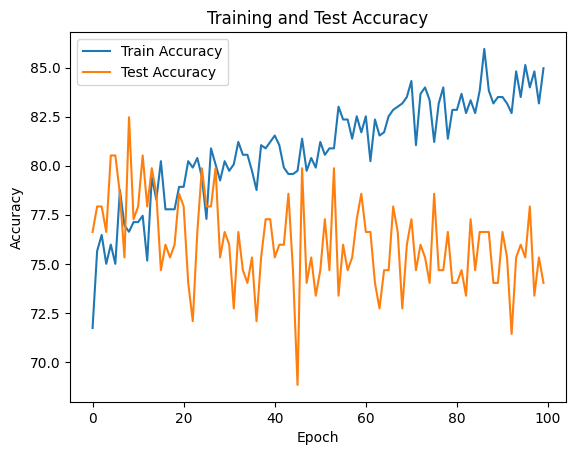

In [147]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

### Optimizer 4: Adagrad algorithm

In [148]:
class NeuralNetwork2(nn.Module):
    def __init__(self,dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Dropout(p=dropout_prob),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
            nn.Dropout(p=dropout_prob),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2(dropout_prob=0.2).to(device)
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    correct /= size
    return (correct*100),loss
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return (correct*100)

    
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)
loss_values=[]

epochs = 100
train_acc_values = []
test_acc_values = []
for t in range(epochs):
    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)
print(f"for Adagrad optimizer accuracy is {round(final_accuracy)}%")

for Adagrad optimizer accuracy is 76%


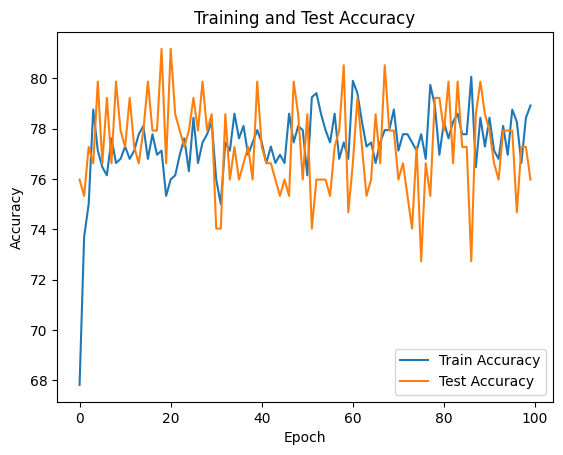

In [149]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

### Hyperparameter: Activation functions

#### From the above learning of optimizer hyperparameter it is observed that the the model without any dropout function is provinding the good accuracy.

#### Now for the activation functions hyperparameter, considering the SGD optimiser model as it is providing the best accuracy among all other optimizers.

In [150]:
class NeuralNetwork2(nn.Module):
    def __init__(self,dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2(dropout_prob=0.2).to(device)
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    correct /= size
    return (correct*100),loss
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return (correct*100)

    
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_values=[]

epochs = 100
train_acc_values = []
test_acc_values = []
for t in range(epochs):
    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)
print(f"for SGD optimizer with leakyrelu activation, accuracy is {round(final_accuracy)}%")

for SGD optimizer with leakyrelu activation, accuracy is 78%


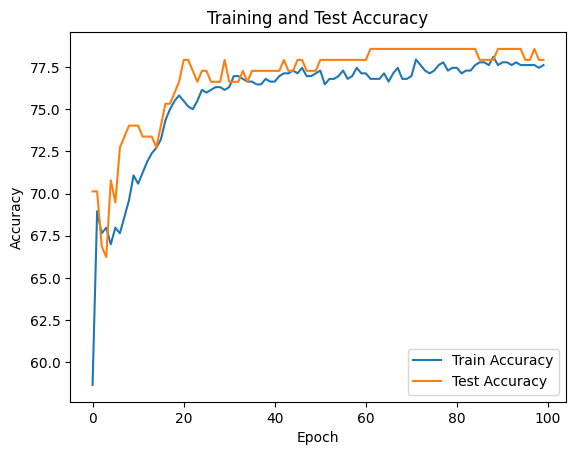

In [151]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

#### Activation function: Sigmoid

In [152]:
class NeuralNetwork2(nn.Module):
    def __init__(self,dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.Sigmoid(),
            nn.Linear(64, 32),
            nn.Sigmoid(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2(dropout_prob=0.2).to(device)
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    correct /= size
    return (correct*100),loss
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return (correct*100)

    
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_values=[]

epochs = 100
train_acc_values = []
test_acc_values = []
for t in range(epochs):
    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)
print(f"for SGD optimizer with Sigmoid activation, accuracy is {round(final_accuracy)}%")

for SGD optimizer with Sigmoid activation, accuracy is 66%


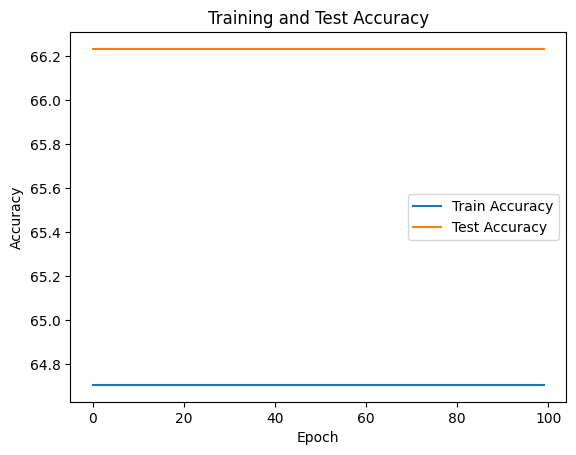

In [153]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

#### Activation function: 

In [154]:
class NeuralNetwork2(nn.Module):
    def __init__(self,dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2(dropout_prob=0.2).to(device)
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    correct /= size
    return (correct*100),loss
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return (correct*100)

    
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_values=[]

epochs = 100
train_acc_values = []
test_acc_values = []
for t in range(epochs):
    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)
print(f"for SGD optimizer with Tanh activation, accuracy is {round(final_accuracy)}%")

for SGD optimizer with Tanh activation, accuracy is 79%


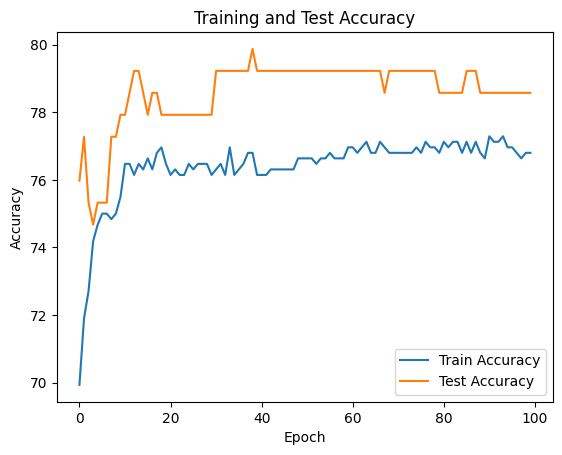

In [155]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

## Hyperparameter: Initialization functions

### Initialization function: Xavier initialization

In [178]:
import torch.nn.init as init

class NeuralNetwork2(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 2),
        )
        for layer in self.linear_relu_stack:
            if isinstance(layer, nn.Linear):
                init.xavier_uniform_(layer.weight)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2(dropout_prob=0.2).to(device)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    correct /= size
    return (correct*100),loss
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return (correct*100)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_values=[]

epochs = 100
train_acc_values = []
test_acc_values = []
for t in range(epochs):
    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)
print(f"for xavier intialization accuracy is {round(final_accuracy)}%")


for xavier intialization accuracy is 79%


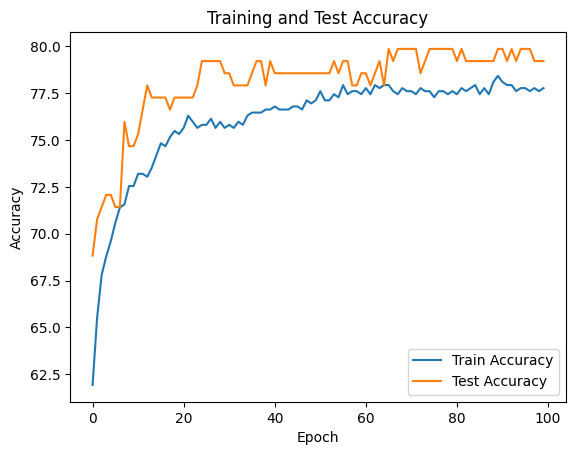

In [157]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

### Uniform initializer

In [179]:
import torch.nn.init as init

class NeuralNetwork2(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 2),
        )
        for layer in self.linear_relu_stack:
            if isinstance(layer, nn.Linear):
                init.uniform_(layer.weight, -0.1, 0.1)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2(dropout_prob=0.2).to(device)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    correct /= size
    return (correct*100),loss
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return (correct*100)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_values=[]

epochs = 100
train_acc_values = []
test_acc_values = []
for t in range(epochs):
    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)
print(f"for uniform intializer accuracy is {round(final_accuracy)}%")
print(f"For SGD optimizer with LeakyReLU activation and uniform initialization, accuracy is {round(final_accuracy,2)}%")


for uniform intializer accuracy is 78%
For SGD optimizer with LeakyReLU activation and uniform initialization, accuracy is 77.92%


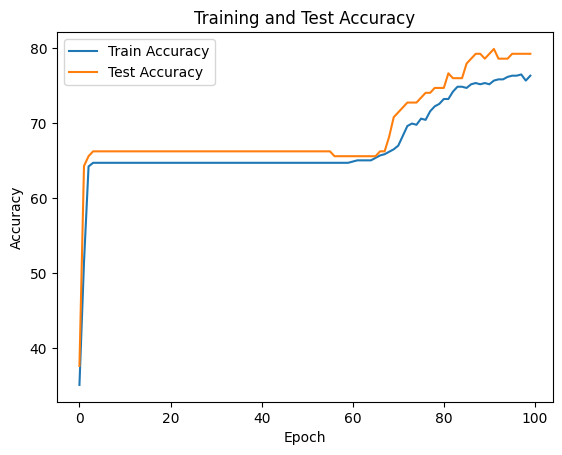

In [159]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

### Ones initialization

In [180]:
import torch.nn.init as init

class NeuralNetwork2(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 2),
        )
        for layer in self.linear_relu_stack:
            if isinstance(layer, nn.Linear):
                init.ones_(layer.weight)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2(dropout_prob=0.2).to(device)
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    correct /= size
    return (correct*100),loss
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return (correct*100)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_values=[]


epochs = 100
train_acc_values = []
test_acc_values = []
for t in range(epochs):
    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)
print(f"for ones intializer accuracy is {round(final_accuracy)}%")


for ones intializer accuracy is 71%


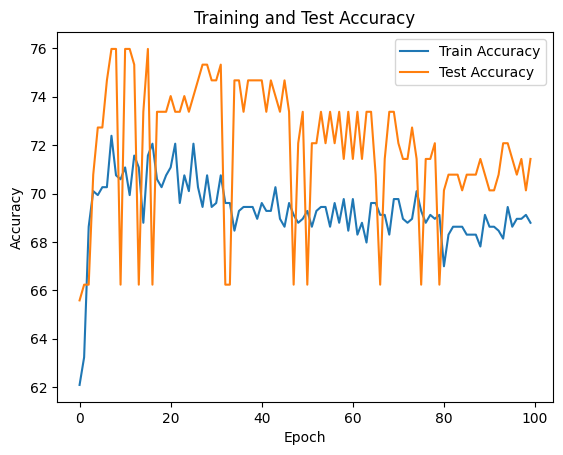

In [164]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

### Zeroes initialization

In [181]:
import torch.nn.init as init

class NeuralNetwork2(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 2),
        )
        for layer in self.linear_relu_stack:
            if isinstance(layer, nn.Linear):
                init.zeros_(layer.weight)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2(dropout_prob=0.2).to(device)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    correct /= size
    return (correct*100),loss
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return (correct*100)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_values=[]

epochs = 100
train_acc_values = []
test_acc_values = []
for t in range(epochs):
    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)
print(f"for Zeroes Intiliazer accuracy is {round(final_accuracy)}%")


for Zeroes Intiliazer accuracy is 66%


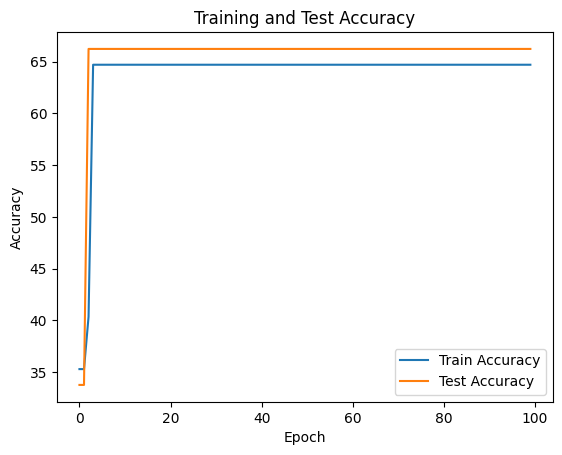

In [166]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

### Part2, STEP 3

#### From all the models above the model with the Leakyrelu activation, SGD optimization and Xavier Initialization provides the best accuracy. So selecting the same model as the base model

In [167]:
#base model
import torch.nn.init as init
class NeuralNetwork2(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 2),
        )
        for layer in self.linear_relu_stack:
            if isinstance(layer, nn.Linear):
                init.xavier_uniform_(layer.weight)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2(dropout_prob=0.2).to(device)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    correct /= size
    return (correct*100),loss
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    
    return (correct*100)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_values=[]
epochs = 100

train_acc_values = []
test_acc_values = []

starttime=time.time()
for t in range(epochs):

    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)

endtime=time.time()
print(f"accuracy of model:{final_accuracy}")
bmtt=endtime-starttime
print(f"time for base model execution{bmtt}")

accuracy of model:77.92207792207793
time for base model execution2.1213877201080322


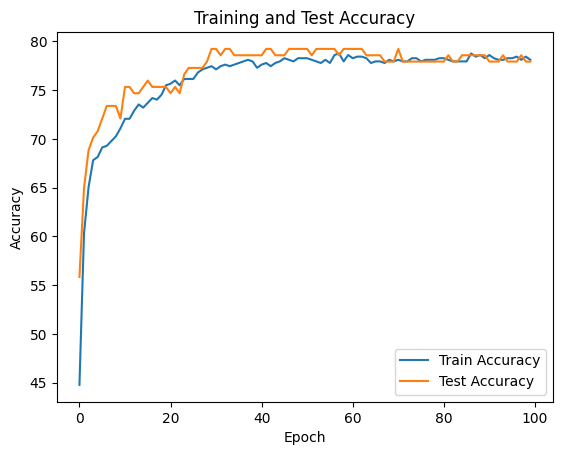

In [168]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

#### saving the base model parmeters

In [169]:
torch.save(model.state_dict(), 'tharunsa_saikorup_assignment2_part2.h5')

#### Base model with the added functionality of early stopping

In [170]:
import torch.nn.init as init


class NeuralNetwork2(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 2),
        )
        for layer in self.linear_relu_stack:
            if isinstance(layer, nn.Linear):
                init.xavier_uniform_(layer.weight)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2(dropout_prob=0.2).to(device)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    correct /= size
    return (correct*100),loss.item()
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    
    return (correct*100)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_values=[]
count = 0
best_accuracy=0
wait=20
epochs = 100
starttime=time.time()
train_acc_values = []
test_acc_values = []
for t in range(epochs):

    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)

    if(final_accuracy>best_accuracy):
        best_accuracy=final_accuracy
        count=0
    else:
        count=count+1
    if(wait==count):
        print(f"reached early stopping at accuracy: {best_accuracy}")
        print(f"stopped at the epochs: {t+1}")
        break
endtime=time.time()
print()
print(f"execution time for the early stopping mode:{endtime-starttime}")
print(f"time for base model execution{bmtt}")

reached early stopping at accuracy: 81.16883116883116
stopped at the epochs: 41

execution time for the early stopping mode:0.7269134521484375
time for base model execution2.1213877201080322


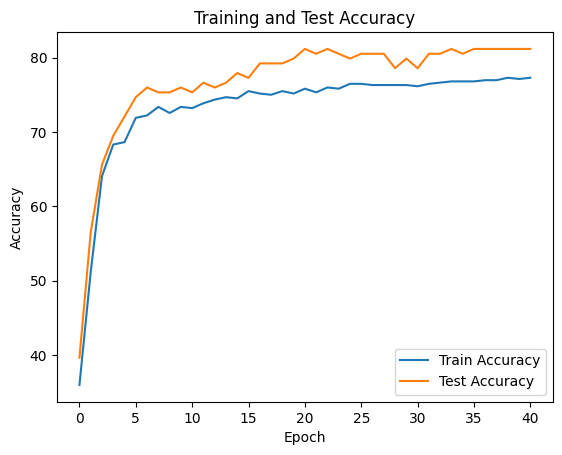

In [171]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

### In the above model with the earlystopping the training time is drastically resduced from 3seconds to 1.2 second

###  Model with learning rate scheduler

In [172]:
import torch.optim.lr_scheduler as lr_scheduler
import torch.nn.init as init
class NeuralNetwork2(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 2),
        )
        for layer in self.linear_relu_stack:
            if isinstance(layer, nn.Linear):
                init.xavier_uniform_(layer.weight)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2(dropout_prob=0.2).to(device)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    correct /= size
    return (correct*100),loss.item()
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    
    
    return (correct*100)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler=lr_scheduler.ReduceLROnPlateau(optimizer, mode='min')
loss_values=[]
epochs = 100
starttime=time.time()
train_acc_values = []
test_acc_values = []
for t in range(epochs):

    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)

    scheduler.step(ls)
endtime=time.time()
print(f"accuracy of model:{final_accuracy}")
mtt=endtime-starttime
print(f"time for the model execution{mtt}")

accuracy of model:79.22077922077922
time for the model execution1.763087272644043


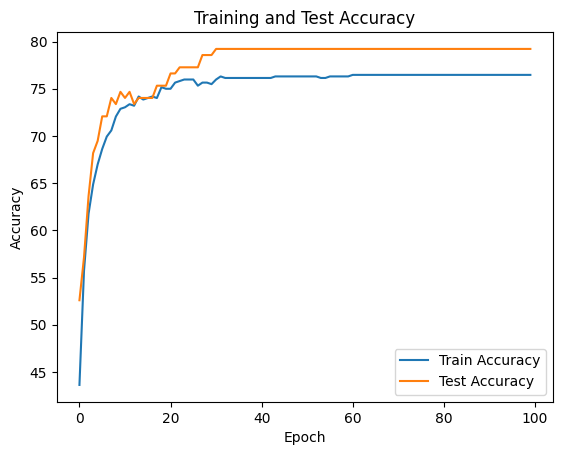

In [173]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

#### Though adding the learning rate scheduler to the model improved the accuracy slightly, but the model time execution hasen't changed much.

#### Building model with the gradient clipping

In [174]:
import torch.nn.init as init
class NeuralNetwork2(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 2),
        )
        for layer in self.linear_relu_stack:
            if isinstance(layer, nn.Linear):
                init.xavier_uniform_(layer.weight)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2(dropout_prob=0.2).to(device)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    correct /= size
    return (correct*100),loss.item()
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    
    return (correct*100)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_values=[]
epochs = 100
starttime=time.time()
train_acc_values = []
test_acc_values = []
for t in range(epochs):
    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)
endtime=time.time()
print(f"accuracy of model:{final_accuracy}")
mtt=endtime-starttime
print(f"time for gradient clipping model execution{mtt}")  

accuracy of model:77.92207792207793
time for gradient clipping model execution1.683579683303833


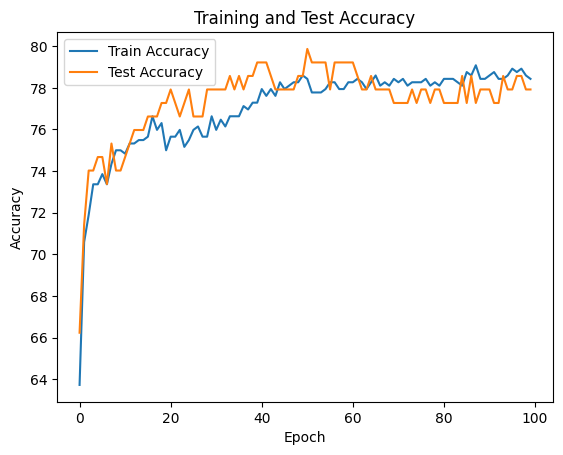

In [175]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

#### In the above model with the gradient clipping it is observed that the accuracy is almost equal to base model but there is slight increase in execution time

In [176]:
#base model
import torch.nn.init as init
class NeuralNetwork2(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(),
            nn.Linear(32, 2),
        )
        for layer in self.linear_relu_stack:
            if isinstance(layer, nn.Linear):
                init.xavier_uniform_(layer.weight)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork2(dropout_prob=0.2).to(device)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    correct = 0
    loss=0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    correct /= size
    return (correct*100),loss.item()
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    
    return (correct*100)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_values=[]
epochs = 100
starttime=time.time()
train_acc_values = []
test_acc_values = []
for t in range(epochs):
    acc,ls=train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_values.append(ls)
    train_acc_values.append(acc)    
    final_accuracy = test_loop(test_dataloader, model, loss_fn)
    test_acc_values.append(final_accuracy)
endtime=time.time()
print(f"accuracy of model:{final_accuracy}")
mtt=endtime-starttime
print(f"time for batch normalization model execution{mtt}")

   

accuracy of model:75.32467532467533
time for batch normalization model execution2.1096370220184326


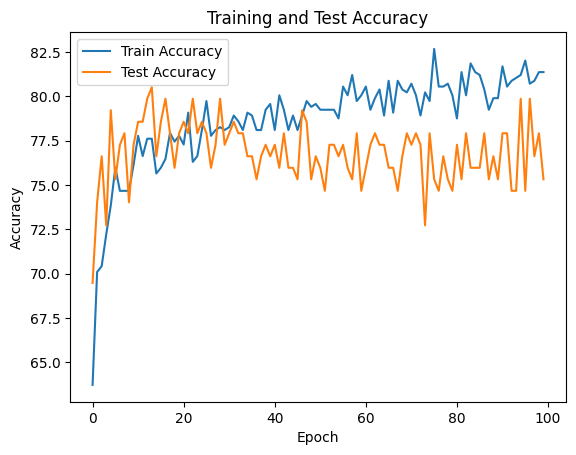

In [177]:
## Plots for Test and Train Accuracies 
plt.plot(train_acc_values, label='Train Accuracy')
plt.plot(test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

#### For the batch normalization model it is observed that the the accuracy and the time taken for execution is almost same

### References:

[1] https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

[2] https://pythonguides.com/pytorch-batch-normalization/

[3] https://androidkt.com/how-to-apply-gradient-clipping-in-pytorch/